## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?
- Apakah hari kerja mempengaruhi jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

In [2]:
#Membaca dataset
day_data = pd.read_csv('./data/day.csv')

#Menampilkan beberapa baris pertama dari dataset
day_data.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_data = pd.read_csv('./data/hour.csv')
hour_data.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset day.csv berisi informasi harian tentang penyewaan sepeda, termasuk variabel seperti suhu, cuaca, dan tanggal.
-  Dataset hour.csv memberikan detail per jam, memungkinkan analisis penyewaan berdasarkan waktu.

### Assessing Data

In [4]:
day_data.info()

day_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [5]:
hour_data.info()
hour_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tidak terdapat missing value pada data.
- Dataset memiliki beberapa nilai ekstrem yang mungkin menjadi outlier.

### Cleaning Data

In [6]:
#Mengatasi Missing Values
print(day_data.isnull().sum())


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [7]:
#Menghapus baris yang memiliki missing values (jika ada)
day_data.dropna(inplace=True)

In [8]:
Q1 = day_data['cnt'].quantile(0.25)
Q3 = day_data['cnt'].quantile(0.75)
IQR = Q3 - Q1
maximum = Q3 + (1.5 * IQR)
minimum = Q1 - (1.5 * IQR)

outliers = day_data[(day_data['cnt'] < minimum) | (day_data['cnt'] > maximum)]
print(f'Jumlah outlier: {outliers.shape[0]}')

#Menghapus outlier
day_data = day_data[(day_data['cnt'] >= minimum) & (day_data['cnt'] <= maximum)]

Jumlah outlier: 0


In [9]:
#Mengatasi Duplicate Data
duplicates = day_data.duplicated().sum()
print(f'Jumlah duplikasi: {duplicates}')
#Menghapus duplikasi
day_data.drop_duplicates(inplace=True)


Jumlah duplikasi: 0


In [10]:
#Menyimpan data bersih ke dalam file baru
day_data.to_csv('./dashboard/day_cleaned.csv', index=False)

#Menampilkan data bersih
print(day_data.head())


   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [11]:
#Mengatasi Missing Values
print(hour_data.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [12]:
#Menghapus baris yang memiliki missing values (jika ada)
hour_data.dropna(inplace=True)

In [13]:
#Menampilkan jumlah outlier
outliers = hour_data[(hour_data['cnt'] < minimum) | (hour_data['cnt'] > maximum)]
print(f'Jumlah outlier: {outliers.shape[0]}')
#Menghapus outlier
hour_data = hour_data[(hour_data['cnt'] >= minimum) & (hour_data['cnt'] <= maximum)]

Jumlah outlier: 0


In [14]:
#Mengatasi Duplicate Data
duplicates = hour_data.duplicated().sum()
print(f'Jumlah duplikasi: {duplicates}')
#Menghapus duplikasi
hour_data.drop_duplicates(inplace=True)

Jumlah duplikasi: 0


In [15]:
#Menyimpan data bersih ke dalam file baru
hour_data.to_csv('./dashboard/hour_cleaned.csv', index=False)

#Menampilkan data bersih
print(hour_data.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


**Insight:**
- Menghapus outlier dan memastikan bahwa tidak ada data yang duplikat.
- Menyimpan data bersih dalam file baru memungkinkan untuk analisis yang lebih terstruktur.

## Exploratory Data Analysis (EDA)

### Explore ...

In [16]:
#Mengambil sampel data
print(day_data.sample(5))

     instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
459      460  2012-04-04       2   1     4        0        3           1   
207      208  2011-07-27       3   0     7        0        3           1   
353      354  2011-12-20       4   0    12        0        2           1   
223      224  2011-08-12       3   0     8        0        5           1   
283      284  2011-10-11       4   0    10        0        2           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
459           1  0.541667  0.533450  0.469583   0.180975    1058        5378   
207           1  0.775000  0.690667  0.402917   0.183463     755        3901   
353           2  0.385833  0.396454  0.595417   0.061571     216        3534   
223           1  0.708333  0.654042  0.415000   0.125621    1051        3854   
283           2  0.566667  0.546096  0.808750   0.143042     667        3896   

      cnt  
459  6436  
207  4656  
353  3750  
223  4905  
28

In [17]:
#Menampilkan deskripsi statistik dari dataset
print(day_data.describe(include="all"))

           instant      dteday      season          yr        mnth  \
count   731.000000         731  731.000000  731.000000  731.000000   
unique         NaN         731         NaN         NaN         NaN   
top            NaN  2011-01-01         NaN         NaN         NaN   
freq           NaN           1         NaN         NaN         NaN   
mean    366.000000         NaN    2.496580    0.500684    6.519836   
std     211.165812         NaN    1.110807    0.500342    3.451913   
min       1.000000         NaN    1.000000    0.000000    1.000000   
25%     183.500000         NaN    2.000000    0.000000    4.000000   
50%     366.000000         NaN    3.000000    1.000000    7.000000   
75%     548.500000         NaN    3.000000    1.000000   10.000000   
max     731.000000         NaN    4.000000    1.000000   12.000000   

           holiday     weekday  workingday  weathersit        temp  \
count   731.000000  731.000000  731.000000  731.000000  731.000000   
unique         NaN 

In [18]:
#Memeriksa nilai unik
print(day_data.dteday.is_unique)
print(day_data.dteday.duplicated().sum())


True
0


In [19]:
#Mengelompokkan data berdasarkan kondisi cuaca
weather_group = day_data.groupby(by="weathersit").agg({
    "cnt": "sum",
    "temp": ["max", "min", "mean", "std"],
})
print(weather_group)

#Mengelompokkan data berdasarkan hari dalam seminggu
weekday_group = day_data.groupby(by="weekday").agg({
    "cnt": "sum",
})

print(weekday_group)

                cnt      temp                             
                sum       max      min      mean       std
weathersit                                                
1           2257952  0.861667  0.05913  0.511541  0.191165
2            996858  0.815000  0.10750  0.470366  0.167180
3             37869  0.633913  0.21750  0.433440  0.131473
            cnt
weekday        
0        444027
1        455503
2        469109
3        473048
4        485395
5        487790
6        477807


**Insight:**
- Jumlah penyewaan lebih tinggi pada hari kerja, yang menunjukkan bahwa sepeda menjadi pilihan transportasi yang populer di kalangan orang yang beraktivitas sehari-hari.
- Dari analisis, terlihat bahwa penyewaan sepeda meningkat saat cuaca cerah. Ini menunjukkan bahwa orang lebih suka menyewa sepeda saat cuaca bagus.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?

C:\Users\acer\AppData\Local\Temp\ipykernel_24888\3050126822.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=day_data, palette='viridis')


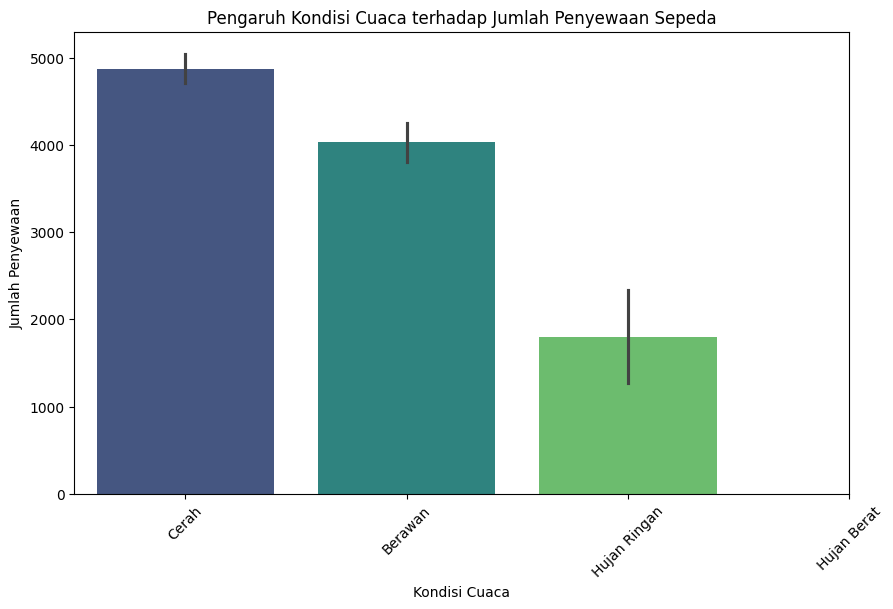

In [20]:
#Visualisasi pengaruh cuaca terhadap penyewaan
plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit', y='cnt', data=day_data, palette='viridis')
plt.title('Pengaruh Kondisi Cuaca terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Cerah', 'Berawan', 'Hujan Ringan', 'Hujan Berat'], rotation=45)
plt.show()

### Pertanyaan 2:Apakah hari kerja mempengaruhi jumlah penyewaan sepeda?

C:\Users\acer\AppData\Local\Temp\ipykernel_24888\4109240541.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weekday', y='cnt', data=weekday_group.reset_index(), palette='coolwarm')


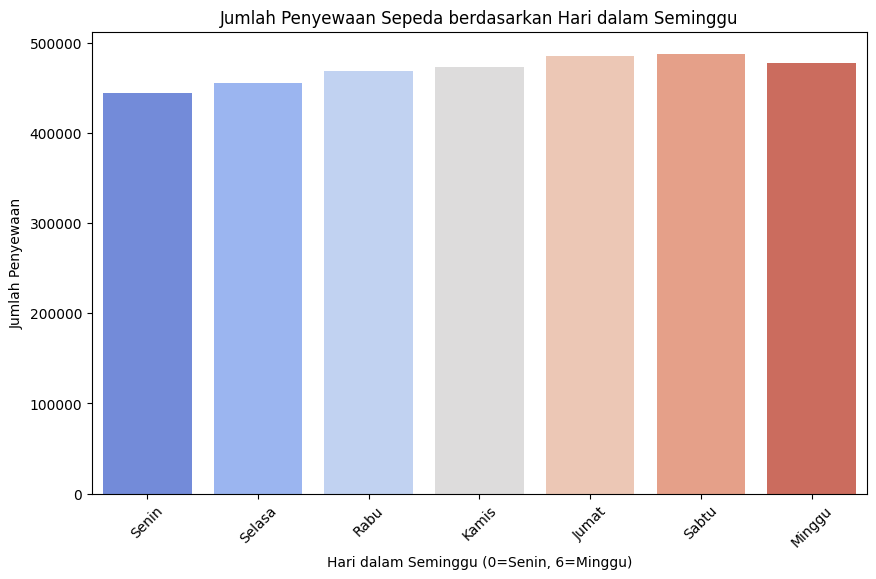

In [21]:
#Visualisasi penyewaan berdasarkan hari dalam seminggu
plt.figure(figsize=(10, 6))
sns.barplot(x='weekday', y='cnt', data=weekday_group.reset_index(), palette='coolwarm')
plt.title('Jumlah Penyewaan Sepeda berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu (0=Senin, 6=Minggu)')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(ticks=range(7), labels=['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'], rotation=45)
plt.show()


**Insight:**
- Jumlah penyewaan lebih tinggi pada hari kerja.
- Penyewaan sepeda meningkat saat cuaca cerah.

## Conclusion